In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
stud_data = pd.read_csv('../studData.csv')
stud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   id_student                                32593 non-null  int64  
 1   code_module_presentation_student          32593 non-null  object 
 2   code_module_presentation_student_encoded  32593 non-null  int64  
 3   date_registration                         32593 non-null  float64
 4   gender                                    32593 non-null  object 
 5   gender_encoded                            32593 non-null  int64  
 6   region                                    32593 non-null  object 
 7   region_encoded                            32593 non-null  int64  
 8   highest_education                         32593 non-null  object 
 9   highest_education_encoded                 32593 non-null  int64  
 10  imd_band                          

In [2]:
stud_data['id_student'] = stud_data['id_student'].astype('object')
stud_data['code_module_presentation_student_encoded'] = stud_data['code_module_presentation_student_encoded'].astype('object')
stud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   id_student                                32593 non-null  object 
 1   code_module_presentation_student          32593 non-null  object 
 2   code_module_presentation_student_encoded  32593 non-null  object 
 3   date_registration                         32593 non-null  float64
 4   gender                                    32593 non-null  object 
 5   gender_encoded                            32593 non-null  int64  
 6   region                                    32593 non-null  object 
 7   region_encoded                            32593 non-null  int64  
 8   highest_education                         32593 non-null  object 
 9   highest_education_encoded                 32593 non-null  int64  
 10  imd_band                          

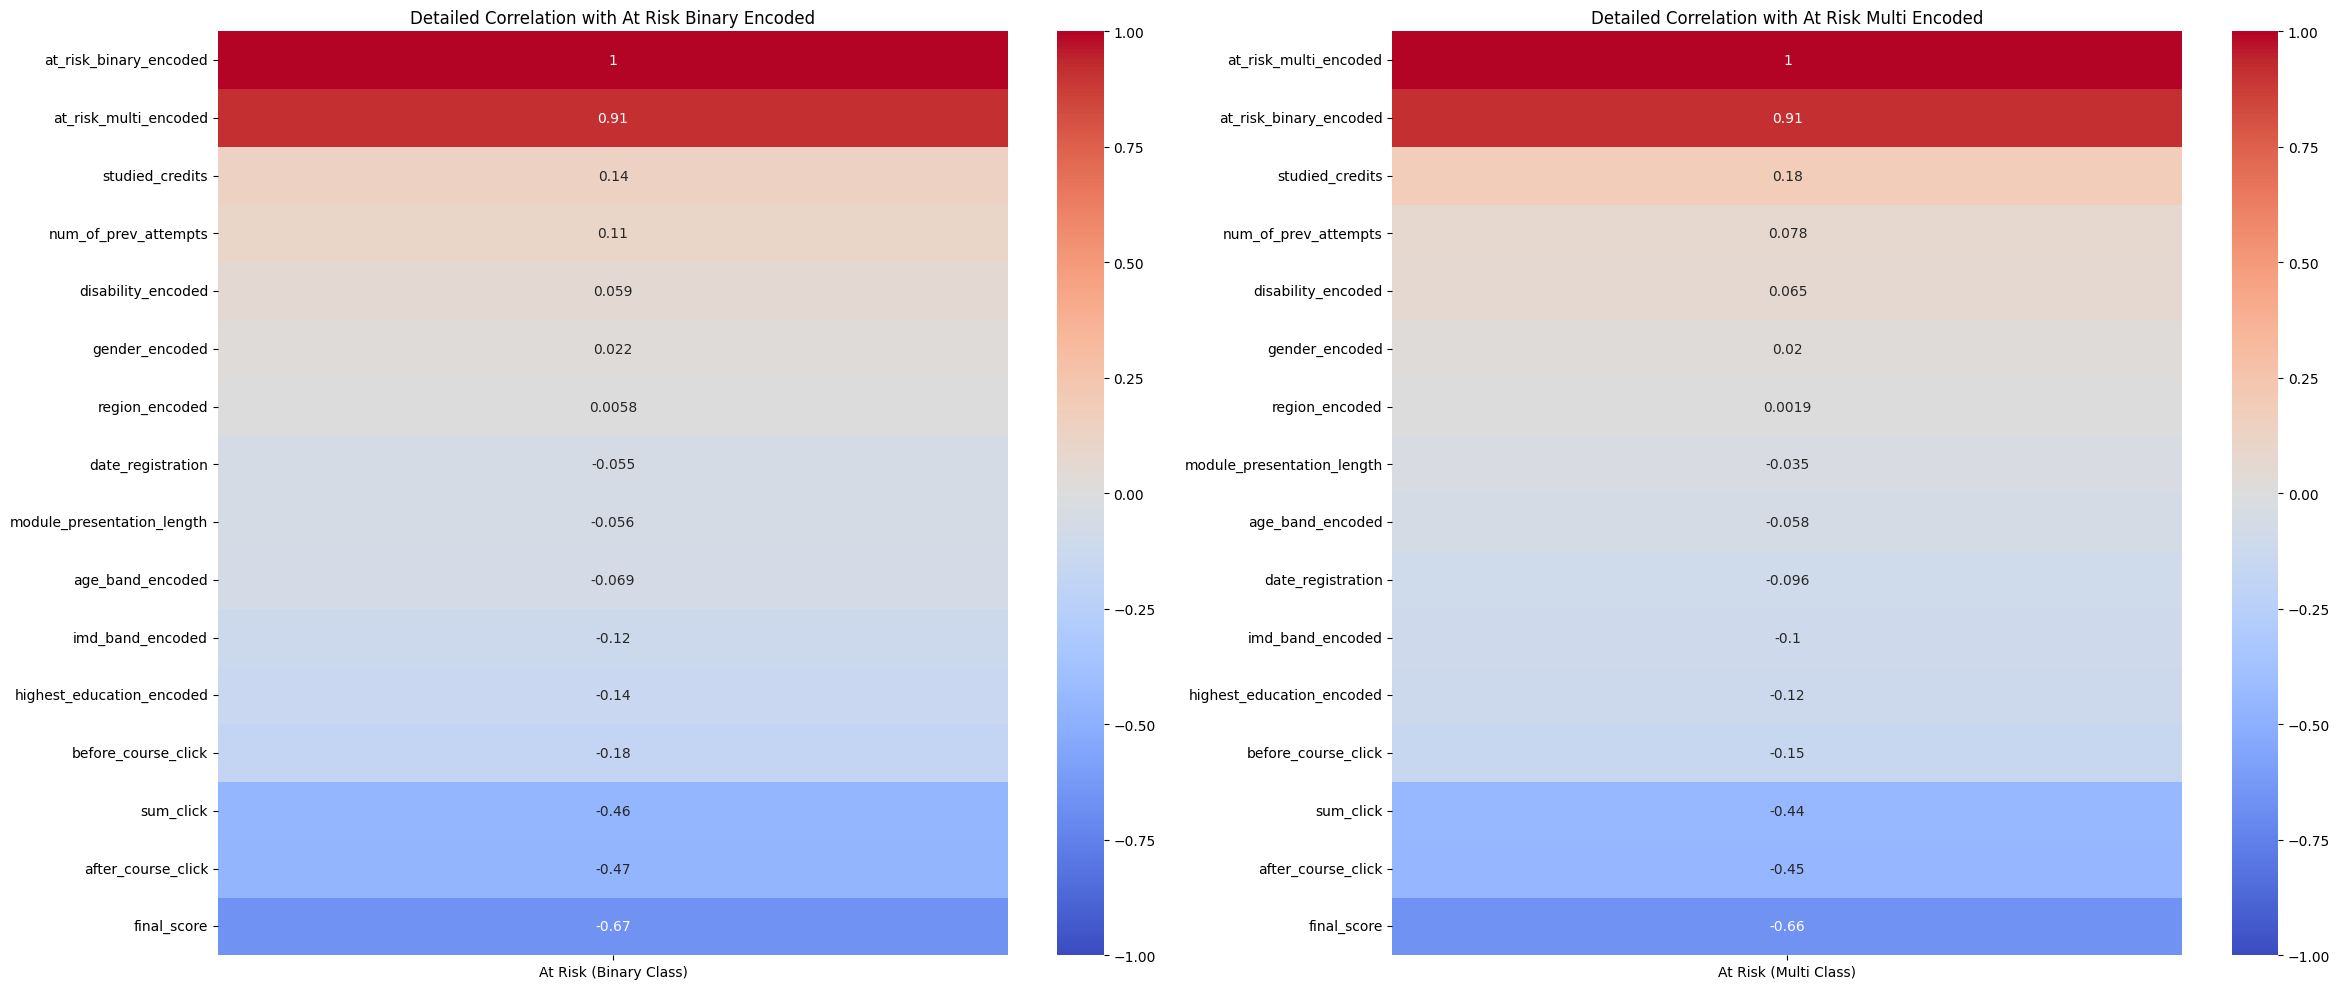

In [3]:
# Detailed correlation analysis graphs
numerical_columns = stud_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the full correlation matrix
correlation_matrix = stud_data[numerical_columns].corr()

# Extract relevant correlations for both 'at_risk_binary_encoded' and 'at_risk_multi_encoded'
relevant_correlations_binary = correlation_matrix[['at_risk_binary_encoded']].sort_values(by='at_risk_binary_encoded', ascending=False)
relevant_correlations_multi = correlation_matrix[['at_risk_multi_encoded']].sort_values(by='at_risk_multi_encoded', ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Plotting detailed correlation heatmap for 'at_risk_binary_encoded'
sns.heatmap(relevant_correlations_binary, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Detailed Correlation with At Risk Binary Encoded')
axes[0].set_xticklabels(['At Risk (Binary Class)'], rotation=0)


# Plotting detailed correlation heatmap for 'at_risk_multi_encoded'
sns.heatmap(relevant_correlations_multi, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('Detailed Correlation with At Risk Multi Encoded')
axes[1].set_xticklabels(['At Risk (Multi Class)'], rotation=0)

plt.tight_layout()
plt.show()

In [4]:
# Selecting significant features based on correlation
significant_features_binary = relevant_correlations_binary[abs(relevant_correlations_binary['at_risk_binary_encoded']) > 0.1].index.tolist()
significant_features_multi = relevant_correlations_multi[abs(relevant_correlations_multi['at_risk_multi_encoded']) > 0.1].index.tolist()

# Removing at_risk_multi_encoded from significant features for binary classification
significant_features_binary.remove('at_risk_multi_encoded')

# Removing at_risk_binary_encoded from significant features for multi classification
significant_features_multi.remove('at_risk_binary_encoded')

significant_features_binary, significant_features_multi

(['at_risk_binary_encoded',
  'studied_credits',
  'num_of_prev_attempts',
  'imd_band_encoded',
  'highest_education_encoded',
  'before_course_click',
  'sum_click',
  'after_course_click',
  'final_score'],
 ['at_risk_multi_encoded',
  'studied_credits',
  'imd_band_encoded',
  'highest_education_encoded',
  'before_course_click',
  'sum_click',
  'after_course_click',
  'final_score'])

In [5]:
selected_features_binary = significant_features_binary + ['imd_band', 'highest_education']
stud_data[selected_features_binary]

,at_risk_binary_encoded,studied_credits,num_of_prev_attempts,imd_band_encoded,highest_education_encoded,before_course_click,sum_click,after_course_click,final_score,imd_band,highest_education
0,0,60,0,2,2,27.0,744.0,717.0,68.7,20-30%,A Level or Equivalent
1,0,60,0,8,1,302.0,4104.0,3802.0,71.6,80-90%,Lower Than A Level
2,0,60,0,3,2,127.0,1944.0,1817.0,76.0,30-40%,A Level or Equivalent
3,0,60,0,6,3,31.0,1150.0,1119.0,77.1,60-70%,HE Qualification
4,0,60,0,3,1,88.0,1896.0,1808.0,69.9,30-40%,Lower Than A Level
...,...,...,...,...,...,...,...,...,...,...,...
32588,0,30,0,3,3,0.0,598.0,598.0,0.0,30-40%,HE Qualification
32589,0,30,0,4,1,0.0,389.0,389.0,0.0,40-50%,Lower Than A Level
32590,1,30,0,6,2,0.0,283.0,283.0,0.0,60-70%,A Level or Equivalent
32591,1,30,0,0,1,21.0,112.0,91.0,0.0,0-10%,Lower Than A Level


In [6]:
stud_data[selected_features_binary].to_csv('Binary/BinarySelectedFeatures.csv', index=False)

In [7]:
selected_features_multi = significant_features_multi + ['imd_band', 'highest_education']
stud_data[selected_features_multi]

,at_risk_multi_encoded,studied_credits,imd_band_encoded,highest_education_encoded,before_course_click,sum_click,after_course_click,final_score,imd_band,highest_education
0,0,60,2,2,27.0,744.0,717.0,68.7,20-30%,A Level or Equivalent
1,0,60,8,1,302.0,4104.0,3802.0,71.6,80-90%,Lower Than A Level
2,0,60,3,2,127.0,1944.0,1817.0,76.0,30-40%,A Level or Equivalent
3,0,60,6,3,31.0,1150.0,1119.0,77.1,60-70%,HE Qualification
4,0,60,3,1,88.0,1896.0,1808.0,69.9,30-40%,Lower Than A Level
...,...,...,...,...,...,...,...,...,...,...
32588,0,30,3,3,0.0,598.0,598.0,0.0,30-40%,HE Qualification
32589,0,30,4,1,0.0,389.0,389.0,0.0,40-50%,Lower Than A Level
32590,1,30,6,2,0.0,283.0,283.0,0.0,60-70%,A Level or Equivalent
32591,2,30,0,1,21.0,112.0,91.0,0.0,0-10%,Lower Than A Level


In [8]:
stud_data[selected_features_multi].to_csv('Multi/MultiSelectedFeatures.csv', index=False)